# TASK 3

## Customer Segmentation Analysis using Python

 
The dataset is a data of Customers visiting and doing a purchase in a Mall. From this dataset we understand the customers choices who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.


The parameters included are :

1) Customer Id

2) gender (M or F)

3) Age 

4) Annual Income (k$) : It is an annual income of how many thousand dollars

5) Spending score : typically refers to a metric used in customer segmentation and marketing. It's often associated with businesses that want to understand their customers' purchasing behavior and habits. The spending score is a numerical value assigned to each customer, reflecting how much they spend on a particular product or at a specific store.


Dataset Link : https://www.kaggle.com/datasets/shwetabh123/mall-customers/data


## Our Task

Clustering Techniques for customer dataset using machine learning
An RFM analysis on the company's customers is used and clustering is done to understand the customers' purchase preference.

Process :-

1: Reading and Understanding Data 

2: Visualizing and Data Cleaning

3: Data Preparation

4: Building K-Means Model and clustering

5: Inference

# Step 1- Reading and Understanding Data

### Importing libraries

In [1]:
# import required libraries for dataframe and visualization
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# import required libraries for clustering
import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
# load data
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# shape
df.shape

(200, 5)

In [5]:
# data description
df.describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdPu')

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.000000,100.500000,57.879185,1.000000,50.750000,100.500000,150.250000,200.000000
Age,200.000000,38.850000,13.969007,18.000000,28.750000,36.000000,49.000000,70.000000
Annual Income (k$),200.000000,60.560000,26.264721,15.000000,41.500000,61.500000,78.000000,137.000000
Spending Score (1-100),200.000000,50.200000,25.823522,1.000000,34.750000,50.000000,73.000000,99.000000


From the above description it is clear that negative and missing values are present. 

In [6]:
# data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
# Finding the count of null values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
# Dropping unwanted columns from the dataset
df_new = df.drop(['CustomerID'], axis=1)
df_new.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [10]:
df_new = df_new.rename(columns={'Annual Income (k$)' : 'Annual_income',
                 'Spending Score (1-100)' : 'Spending_score'})

df_new.head()

,Gender,Age,Annual_income,Spending_score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


# Step 2 : Visualizing and Understanding the Data

In [11]:
# data correlation
corr = df_new.corr()
corr

,Age,Annual_income,Spending_score
Age,1.000000,-0.012398,-0.327227
Annual_income,-0.012398,1.000000,0.009903
Spending_score,-0.327227,0.009903,1.000000


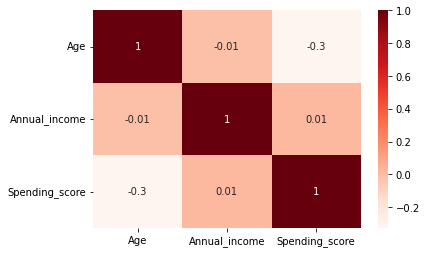

In [13]:
sns.heatmap(corr,annot=True,cmap='Reds',fmt='.1g')
plt.show()

In [14]:
df_new['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [16]:
df_new['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [17]:
df_new.describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdPu')

,count,mean,std,min,25%,50%,75%,max
Age,200.000000,38.850000,13.969007,18.000000,28.750000,36.000000,49.000000,70.000000
Annual_income,200.000000,60.560000,26.264721,15.000000,41.500000,61.500000,78.000000,137.000000
Spending_score,200.000000,50.200000,25.823522,1.000000,34.750000,50.000000,73.000000,99.000000


In [18]:
df_new.columns

Index(['Gender', 'Age', 'Annual_income', 'Spending_score'], dtype='object')

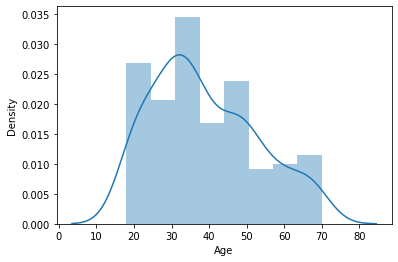

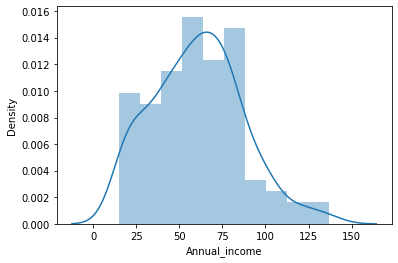

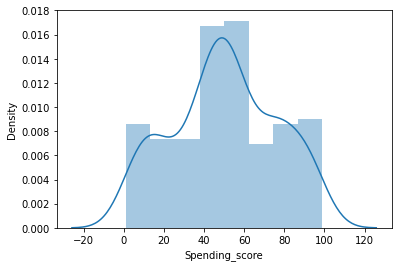

In [19]:
columns = ['Age', 'Annual_income', 'Spending_score']
for i in columns:
    plt.figure()
    sns.distplot(df_new[i])

In [21]:
labels=df_new['Gender'].unique()
values=df_new['Gender'].value_counts(ascending=True)

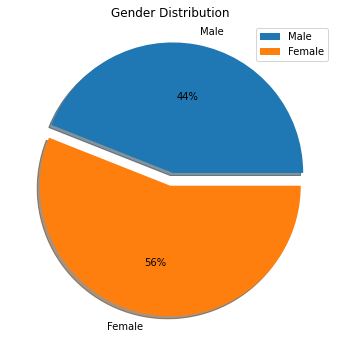

In [60]:
## explode values to emphasize a specific section
explode = (0.1, 0)


plt.subplots(ncols=1,figsize=(10,6))

plt.pie(x=values, 
        labels=labels,
        explode=explode,
        autopct=autopct,
        shadow=True)

# title to the chart
plt.title("Gender Distribution")

# Add a legend
plt.legend(loc='best')

plt.show()

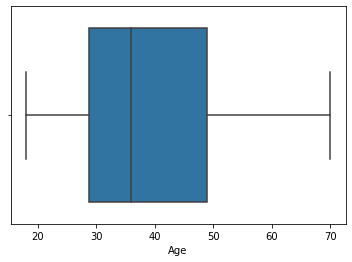

In [35]:
sns.boxplot(df_new['Age'])
plt.show()

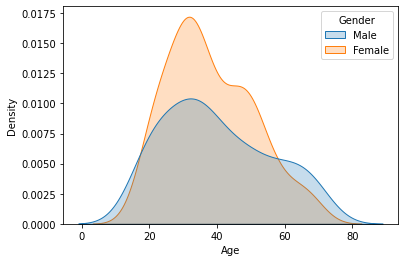

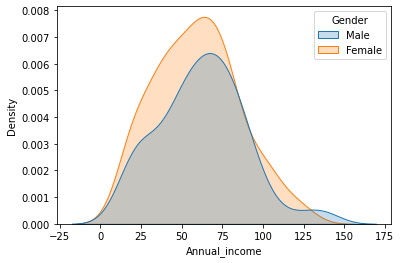

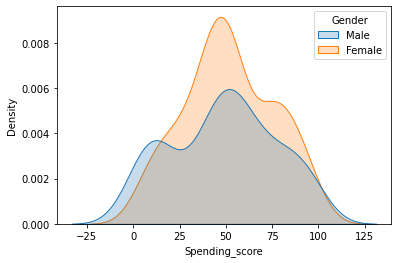

In [36]:
columns = ['Age', 'Annual_income', 'Spending_score']
for i in columns:
    plt.figure()
    sns.kdeplot(data=df_new, x=i, shade=True, hue='Gender')

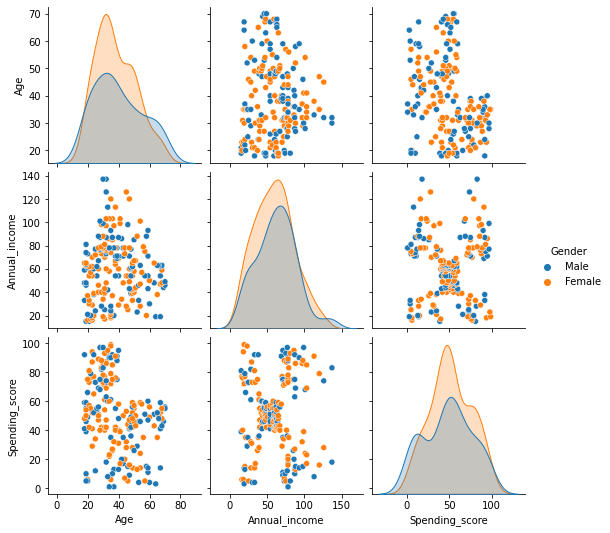

In [39]:
sns.pairplot(df_new,hue='Gender')

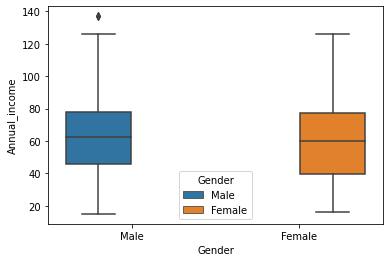

In [41]:
sns.boxplot(x=df_new['Gender'], y=df_new["Annual_income"], hue=df_new['Gender'])
plt.show()

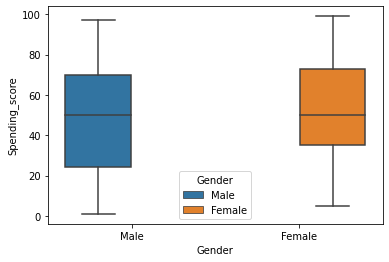

In [42]:
sns.boxplot(x=df_new['Gender'], y=df_new["Spending_score"], hue=df_new['Gender'])
plt.show()

# Step 3 :Building K-Means Model & Clustering

In [44]:
df_new.head()

,Gender,Age,Annual_income,Spending_score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [45]:
clustering_data = df_new.iloc[:,[2,3]]
clustering_data.head()

,Annual_income,Spending_score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [47]:
# Using the Elbow Method to find the Optimal Number of Clusters

from sklearn.cluster import KMeans
wcss = []

for i in range(1,30):
    km = KMeans(i)
    km.fit(clustering_data)
    wcss.append(km.inertia_)
np.array(wcss)

array([269981.28      , 181363.5959596 , 106348.37306211,  73679.78903949,
        44448.45544793,  37442.24745038,  30241.34361794,  25018.57633478,
        21838.86369283,  19664.68519601,  17577.68782886,  16281.05231849,
        14804.6510052 ,  13111.77409284,  12274.52465628,  10862.23000912,
        10253.55626133,   9473.21629898,   8628.22019394,   8182.39426057,
         7646.31311605,   7096.7052092 ,   6872.89237977,   6476.15840442,
         6025.67375819,   5864.03823293,   5559.46470751,   5171.2468254 ,
         4845.56810496])

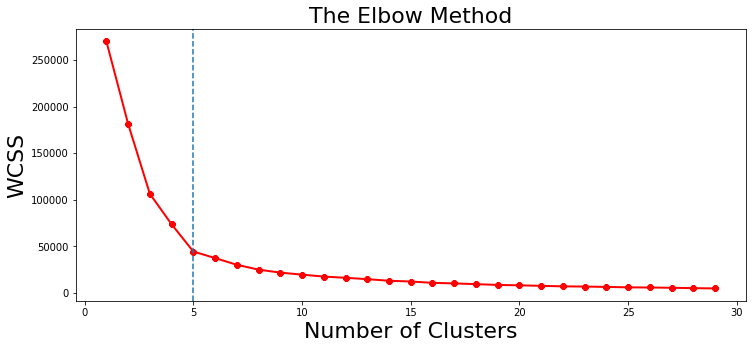

In [52]:
fig, ax = plt.subplots(figsize=(12,5))
ax = plt.plot(range(1,30),wcss, linewidth=2, color="red", marker ="8")
plt.axvline(x=5, ls='--')

plt.title('The Elbow Method',fontsize=22)
plt.xlabel('Number of Clusters', fontsize=22)
plt.ylabel('WCSS', fontsize=22)
plt.show() 

**It is clear, that the optimal number of clusters for this data is 5, as the slope of the curve is not steep enough after it. When we observe this curve, we see that last elbow comes at k = 5, it would be difficult to visualize the elbow if we choose the higher range.**

In [53]:
kms = KMeans(n_clusters=5, init='k-means++')
kms.fit(clustering_data)

KMeans(n_clusters=5)

In [54]:
clusters = clustering_data.copy()
clusters['Cluster_Prediction'] = kms.fit_predict(clustering_data)
clusters.head()

,Annual_income,Spending_score,Cluster_Prediction
0,15,39,4
1,15,81,0
2,16,6,4
3,16,77,0
4,17,40,4


In [55]:
kms.cluster_centers_

array([[25.72727273, 79.36363636],
       [86.53846154, 82.12820513],
       [55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348]])

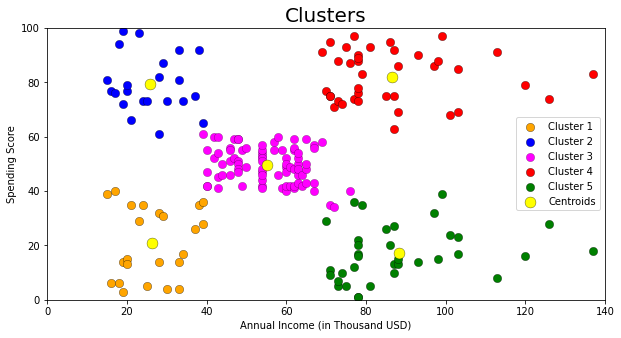

In [59]:
fig, ax = plt.subplots(figsize=(10,5)) 
plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 4]['Annual_income'],
            y=clusters[clusters['Cluster_Prediction'] == 4]['Spending_score'],
            s=70,edgecolor='black', linewidth=0.3, c='orange', label='Cluster 1')

plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 0]['Annual_income'],
            y=clusters[clusters['Cluster_Prediction'] == 0]['Spending_score'],
            s=70,edgecolor='black', linewidth=0.3, c='blue', label='Cluster 2')

plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 2]['Annual_income'],
            y=clusters[clusters['Cluster_Prediction'] == 2]['Spending_score'],
            s=70,edgecolor='black', linewidth=0.2, c='Magenta', label='Cluster 3')

plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 1]['Annual_income'],
            y=clusters[clusters['Cluster_Prediction'] == 1]['Spending_score'],
            s=70,edgecolor='black', linewidth=0.3, c='red', label='Cluster 4')

plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 3]['Annual_income'],
            y=clusters[clusters['Cluster_Prediction'] == 3]['Spending_score'],
            s=70,edgecolor='black', linewidth=0.3, c='green', label='Cluster 5')



plt.scatter(x=kms.cluster_centers_[:, 0], y=kms.cluster_centers_[:, 1], s = 120, c = 'yellow', label = 'Centroids',edgecolor='black', linewidth=0.3)
plt.legend(loc='right')
plt.xlim(0,140)
plt.ylim(0,100)
plt.xlabel('Annual Income (in Thousand USD)')
plt.ylabel('Spending Score')
plt.title('Clusters', fontsize = 20)
plt.show()

# INFERENCE

Analyzing Data using the above graph is easier as it gives us a visual aid for better understanding of the 
data.

Kmeans has divided the dataset into 5 clusters based on Annual income and the spending scores of the individual customers.

The following clusters are created by the model, 
1. Cluster Orange
2. Cluster Blue
3. Cluster Pink
4. Cluster Red
5. Cluster Green

**1 )Cluster Orange - Balanced Customers :**

    They earn less and spend less.
    

**2) Cluster Blue - Pinch Penny Customers :**

    Earning high and spending less. 

**3) Cluster Pink - Normal Customer :**

    Customers are average in terms of earning and spending 
    

**4) Cluster Red - Spenders :**

    This type of customers earns less but spends more Annual Income is less but spending high

**5) Cluster Green - Target Customers :**

    Earning high and also spending high Target Customers. 